In [1]:
import numpy as np
import tensorflow as tf

MNIST = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = MNIST.load_data()

# The x_train and x_test variables contain the actual pixel values for all 784 pixels in each image.
# While the y_train and y_test variables contain the corresponding digit from 0 - 9. 

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

11501568/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [2]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

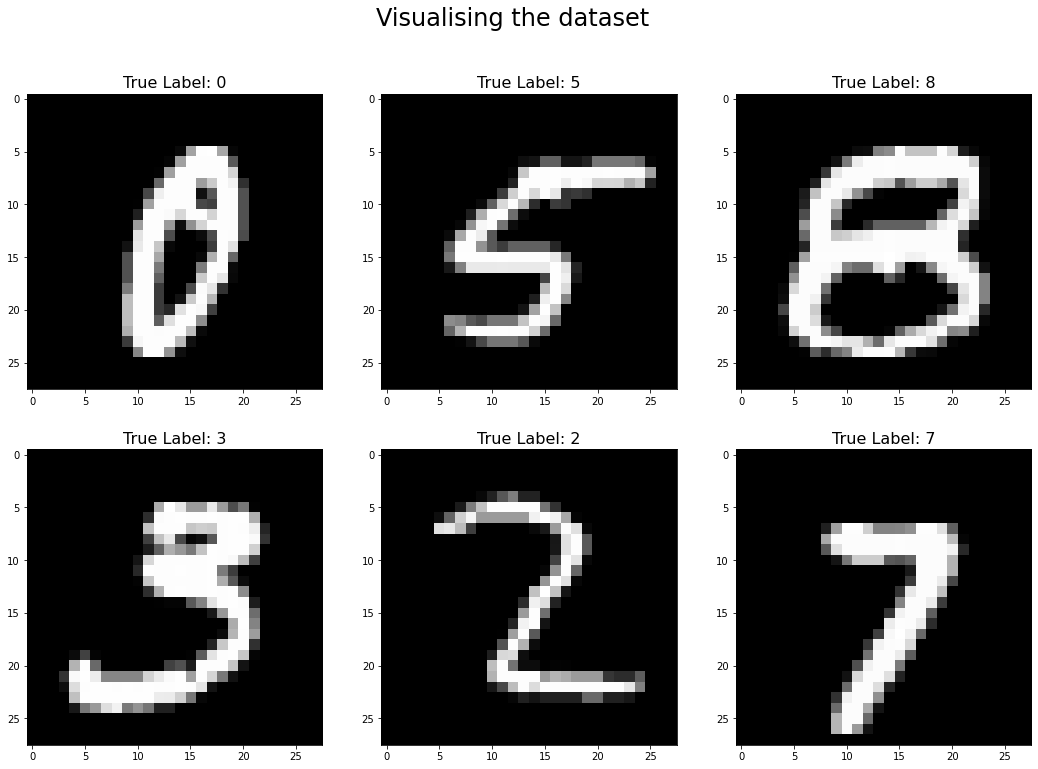

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(18, 12))

for i in range(2):
    for j in range(3):
        index = np.random.randint(0, 60000)
        ax[i, j].imshow(x_train[index], cmap='gray')
        ax[i, j].set_title(f'True Label: {y_train[index]}', fontsize=16)
        index += 1

plt.suptitle('Visualising the dataset', fontsize=24)
plt.show()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


model = Sequential()
model.add(Flatten(input_shape = x_train[0].shape))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2)) 
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-traina

In [7]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.6869 - accuracy: 0.8039 - val_loss: 0.2707 - val_accuracy: 0.9213
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3036 - accuracy: 0.9125 - val_loss: 0.2009 - val_accuracy: 0.9398
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2423 - accuracy: 0.9296 - val_loss: 0.1666 - val_accuracy: 0.9484
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2072 - accuracy: 0.9402 - val_loss: 0.1452 - val_accuracy: 0.9565
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1810 - accuracy: 0.9473 - val_loss: 0.1275 - val_accuracy: 0.9609
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1637 - accuracy: 0.9524 - val_loss: 0.1193 - val_accuracy: 0.9640
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1487 - accuracy: 0.9553 - val_loss: 0.1121 - val_accuracy:

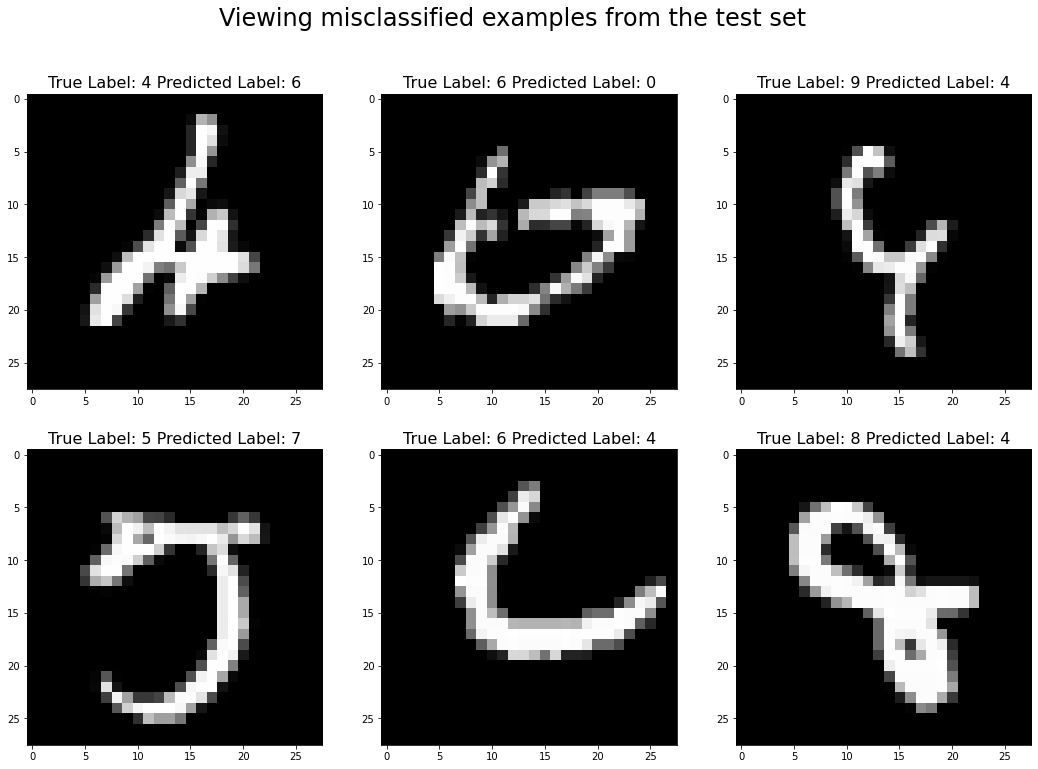

In [8]:
import random

model_predictions = model.predict(x_test).argmax(axis=1)

misclassified_examples = np.where(model_predictions != y_test)[0] # Since it returns a tuple containing an array.

fig, ax = plt.subplots(2, 3, figsize=(18, 12))

for i in range(2):
    for j in range(3):
        index = random.choice(misclassified_examples)
        ax[i, j].imshow(x_test[index], cmap='gray')
        ax[i, j].set_title(f'True Label: {y_test[index]} Predicted Label: {model_predictions[index]}', fontsize=16)

plt.suptitle('Viewing misclassified examples from the test set', fontsize=24)
plt.show()

In [9]:
# Saving and loading the model for future use:

from tensorflow.keras.models import load_model

model.save('MNIST_ANN.h5')

saved_model = load_model('MNIST_ANN.h5')

saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-traina